In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import pickle
import json
from univariate.rnn_univariate import univariate_ts_rnn

IndentationError: unexpected indent (Temp/ipykernel_5480/1543283476.py, line 2)

In [1]:
def generate_rnn_report(forecast_steps,
                        series,
                          save_json=True,
                          time_steps=10,
                hidden_layers=14,
                epochs=50,
                loss_stopping_patience=20,
                batch_size=15,
                verbose=2,
                loss_curve=True,
                forecast_eval=True,
                activation=['tanh', 'tanh'],
                split=0.75,
                normalize=True,
                learning_rate=0.001,
                return_predictions=True):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import tensorflow as tf
    import os
    import pickle
    import json
    from univariate.rnn_univariate import univariate_ts_rnn

    model=univariate_ts_rnn(
        time_steps=time_steps,
                hidden_layers=hidden_layers,
                epochs=epochs,
                loss_stopping_patience=loss_stopping_patience,
                batch_size=batch_size,
                verbose=verbose,
                loss_curve=loss_curve,
                forecast_eval=True,
                activation=activation,
                split=split,
                normalize=True,
                learning_rate=learning_rate,
                return_predictions=True
    )
    scaler,model,past_test_val,past_preds=model.train(data=series)
    past_test_val=np.asarray(past_test_val)
    past_preds=np.asarray(past_preds)

    static_folder = "static"

    if(save_json==True):
        # Create the static folder if it doesn't exist
        if not os.path.exists(static_folder):
            os.makedirs(static_folder)

        # File path for the pickle file
        past_test_json_file_path = os.path.join(static_folder, "past_test.json")
        with open(past_test_json_file_path, "w") as f:
            json.dump(past_test_val.tolist(), f)

        past_preds_json_file_path = os.path.join(static_folder, "past_preds.json")
        with open(past_preds_json_file_path, "w") as f:
            json.dump(past_preds.tolist(), f)

    
    forecast_steps=forecast_steps
    last_batch=series[len(series)-time_steps:]
    forecast=[]
    for step in range(forecast_steps):
        pred=model.predict(np.array(last_batch).reshape(1,10,1))
        forecast.append(pred)
        last_batch=np.append(last_batch[1:],pred)
    forecast=np.array(forecast).flatten()
    final_forecast=scaler.inverse_transform(forecast.reshape(-1,1))
    
    return past_test_val,past_preds,final_forecast
    
        

In [61]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-30,507.662872,518.311951,507.588562,517.494690,502.731873,7235452
1,2017-01-31,518.510071,521.952393,515.265808,517.692810,502.924377,6980274
2,2017-02-01,518.138550,520.516052,512.739746,519.896912,505.065613,5220617
3,2017-02-02,520.070251,520.466492,514.250427,516.850769,502.106384,4199246
4,2017-02-03,518.089050,520.293152,510.213684,511.972015,497.366791,6100788
...,...,...,...,...,...,...,...
1479,2023-01-20,2475.000000,2475.000000,2437.250000,2442.649902,2442.649902,6890325
1480,2023-01-23,2449.000000,2466.199951,2425.000000,2430.300049,2430.300049,5055324
1481,2023-01-24,2440.000000,2443.649902,2387.350098,2415.949951,2415.949951,7609558
1482,2023-01-25,2412.449951,2414.699951,2380.000000,2382.550049,2382.550049,5715684


Epoch 1/400
12/12 - 2s - loss: 0.0015 - mean_absolute_percentage_error: 217.3589 - val_loss: 0.0087 - val_mean_absolute_percentage_error: 12.3268 - 2s/epoch - 160ms/step
Epoch 2/400
12/12 - 0s - loss: 1.5566e-04 - mean_absolute_percentage_error: 80.8654 - val_loss: 0.0100 - val_mean_absolute_percentage_error: 15.0459 - 63ms/epoch - 5ms/step
Epoch 3/400
12/12 - 0s - loss: 9.8932e-05 - mean_absolute_percentage_error: 36.6389 - val_loss: 0.0055 - val_mean_absolute_percentage_error: 12.4935 - 62ms/epoch - 5ms/step
Epoch 4/400
12/12 - 0s - loss: 6.9219e-05 - mean_absolute_percentage_error: 31.2792 - val_loss: 0.0069 - val_mean_absolute_percentage_error: 10.0414 - 82ms/epoch - 7ms/step
Epoch 5/400
12/12 - 0s - loss: 7.4384e-05 - mean_absolute_percentage_error: 29.9174 - val_loss: 0.0060 - val_mean_absolute_percentage_error: 8.6976 - 66ms/epoch - 5ms/step
Epoch 6/400
12/12 - 0s - loss: 5.6059e-05 - mean_absolute_percentage_error: 23.4730 - val_loss: 0.0055 - val_mean_absolute_percentage_error

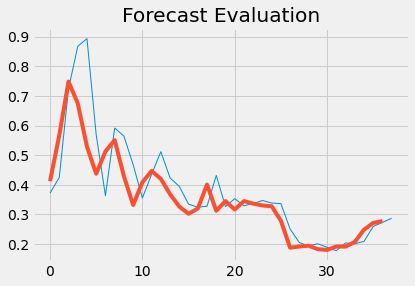

1/1 [==============================] - 0s 18ms/step


In [62]:
df=pd.read_csv('data/portfolio_data.csv')
series=np.array(df['BTC'])
past_test_val,past_preds,final_forecast=generate_rnn_report(forecast_steps=10,series=series, epochs=400, hidden_layers=100, batch_size=10, loss_curve=False)

In [17]:
final_forecast

array([[18971.645   ],
       [17823.49    ],
       [16197.005   ],
       [   58.442455],
       [  649.1407  ],
       [ 7988.7705  ],
       [ 1430.5521  ],
       [  -58.80298 ],
       [  293.15652 ],
       [-3008.3245  ]], dtype=float32)

Epoch 1/400
12/12 - 1s - loss: 0.0042 - mean_absolute_percentage_error: 51.9368 - val_loss: 0.0214 - val_mean_absolute_percentage_error: 15.8588 - 1s/epoch - 97ms/step
Epoch 2/400
12/12 - 0s - loss: 5.1443e-04 - mean_absolute_percentage_error: 22.4547 - val_loss: 0.0258 - val_mean_absolute_percentage_error: 17.7190 - 78ms/epoch - 6ms/step
Epoch 3/400
12/12 - 0s - loss: 2.1105e-04 - mean_absolute_percentage_error: 14.7336 - val_loss: 0.0319 - val_mean_absolute_percentage_error: 20.4470 - 71ms/epoch - 6ms/step
Epoch 4/400
12/12 - 0s - loss: 1.6877e-04 - mean_absolute_percentage_error: 10.6057 - val_loss: 0.0334 - val_mean_absolute_percentage_error: 21.2451 - 70ms/epoch - 6ms/step
Epoch 5/400
12/12 - 0s - loss: 1.5524e-04 - mean_absolute_percentage_error: 10.4607 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 18.9101 - 70ms/epoch - 6ms/step
Epoch 6/400
12/12 - 0s - loss: 1.3221e-04 - mean_absolute_percentage_error: 9.4010 - val_loss: 0.0242 - val_mean_absolute_percentage_error: 

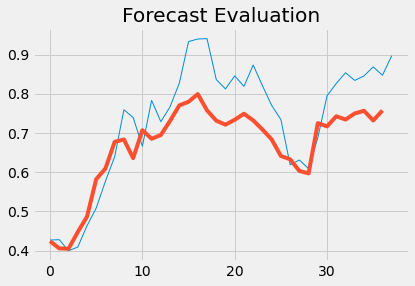

1/1 [==============================] - 0s 21ms/step


In [57]:
df=pd.read_csv('data/portfolio_data.csv')
series=np.array(df['NFLX'])
past_test_val,past_preds,final_forecast=generate_rnn_report(forecast_steps=10,series=series, epochs=400, hidden_layers=100, batch_size=10, loss_curve=False)

Epoch 1/400
12/12 - 1s - loss: 0.0195 - mean_absolute_percentage_error: 12132.8916 - val_loss: 0.0314 - val_mean_absolute_percentage_error: 19.8114 - 1s/epoch - 84ms/step
Epoch 2/400
12/12 - 0s - loss: 0.0026 - mean_absolute_percentage_error: 324166.7500 - val_loss: 0.0305 - val_mean_absolute_percentage_error: 19.5942 - 61ms/epoch - 5ms/step
Epoch 3/400
12/12 - 0s - loss: 0.0016 - mean_absolute_percentage_error: 597769.1250 - val_loss: 0.0168 - val_mean_absolute_percentage_error: 14.1536 - 75ms/epoch - 6ms/step
Epoch 4/400
12/12 - 0s - loss: 0.0013 - mean_absolute_percentage_error: 571699.9375 - val_loss: 0.0180 - val_mean_absolute_percentage_error: 14.7674 - 78ms/epoch - 7ms/step
Epoch 5/400
12/12 - 0s - loss: 0.0012 - mean_absolute_percentage_error: 386487.2812 - val_loss: 0.0181 - val_mean_absolute_percentage_error: 14.8515 - 65ms/epoch - 5ms/step
Epoch 6/400
12/12 - 0s - loss: 0.0011 - mean_absolute_percentage_error: 419475.0312 - val_loss: 0.0154 - val_mean_absolute_percentage_err

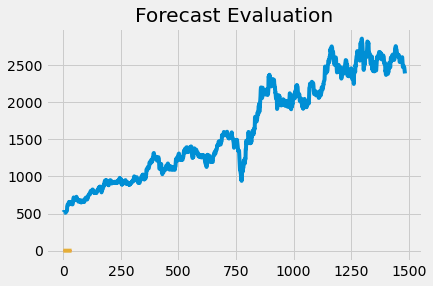

1/1 [==============================] - 0s 17ms/step


In [60]:
reliance_df=pd.read_csv('data/RELIANCE.NS.csv')
reliance_df['High'].plot()
series=np.array(reliance_df['High'])
past_test_val,past_preds,final_forecast=generate_rnn_report(forecast_steps=10,series=series, epochs=400, hidden_layers=100, batch_size=10, loss_curve=False)

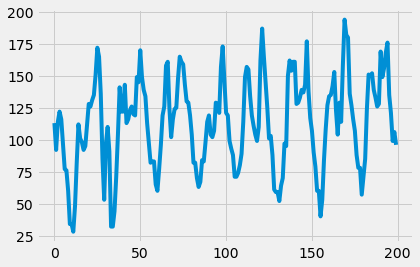

Epoch 1/400
2/2 - 1s - loss: 0.0844 - mean_absolute_percentage_error: 86.8025 - val_loss: 0.0258 - val_mean_absolute_percentage_error: 35.4723 - 952ms/epoch - 476ms/step
Epoch 2/400
2/2 - 0s - loss: 0.0554 - mean_absolute_percentage_error: 107.4818 - val_loss: 0.0342 - val_mean_absolute_percentage_error: 40.5648 - 28ms/epoch - 14ms/step
Epoch 3/400
2/2 - 0s - loss: 0.0544 - mean_absolute_percentage_error: 118.2198 - val_loss: 0.0335 - val_mean_absolute_percentage_error: 39.3804 - 27ms/epoch - 14ms/step
Epoch 4/400
2/2 - 0s - loss: 0.0493 - mean_absolute_percentage_error: 113.5482 - val_loss: 0.0232 - val_mean_absolute_percentage_error: 32.4838 - 28ms/epoch - 14ms/step
Epoch 5/400
2/2 - 0s - loss: 0.0390 - mean_absolute_percentage_error: 95.7303 - val_loss: 0.0116 - val_mean_absolute_percentage_error: 23.5856 - 27ms/epoch - 14ms/step
Epoch 6/400
2/2 - 0s - loss: 0.0294 - mean_absolute_percentage_error: 63.8214 - val_loss: 0.0060 - val_mean_absolute_percentage_error: 16.8048 - 26ms/epoch

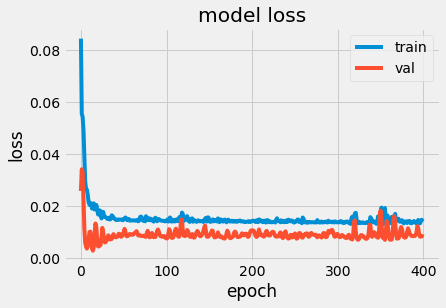

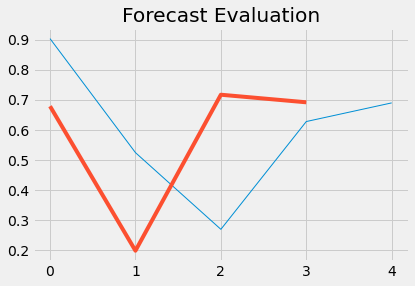

ValueError: cannot reshape array of size 5 into shape (1,10,1)

In [40]:
air_df=pd.read_excel('data/AirQualityUCI.xlsx')
air_df.replace(-200, method='bfill', inplace=True)
air_df['NO2(GT)'].iloc[:200].plot()
plt.show()
past_test_val,past_preds,final_forecast=generate_rnn_report(forecast_steps=10,series=np.array(air_df['NO2(GT)'].iloc[:100]), epochs=400, hidden_layers=50, batch_size=10, loss_curve=True,time_steps=5)

In [51]:
sales_df=pd.read_csv('data/units_train.csv')
sales_df[sales_df['country']=='Belgium']['num_sold'].iloc[:2000]

0       663
1       615
2       480
3       710
4       240
       ... 
1155    363
1156    131
1157     98
1158     80
1159    136
Name: num_sold, Length: 200, dtype: int64

In [53]:
temp_df=sales_df[sales_df['country']=='Belgium']
temp_df['date']=pd.to_datetime(temp_df['date'])
temp_df.index=temp_df['date']

C:\Users\ved14\AppData\Local\Temp/ipykernel_5480/2977198687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['date']=pd.to_datetime(temp_df['date'])


<AxesSubplot:xlabel='date'>

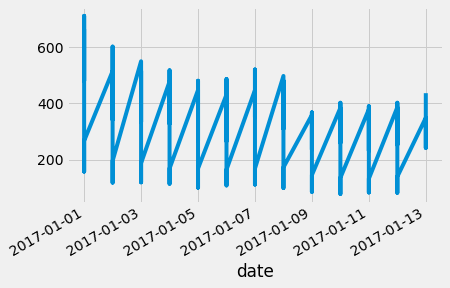

In [56]:
temp_df['num_sold'].iloc[:100].plot()

Epoch 1/50
8/8 - 1s - loss: 0.2288 - mean_absolute_percentage_error: 148.6332 - val_loss: 0.9899 - val_mean_absolute_percentage_error: 123.5043 - 1s/epoch - 169ms/step
Epoch 2/50
8/8 - 0s - loss: 0.0965 - mean_absolute_percentage_error: 100.7208 - val_loss: 0.5413 - val_mean_absolute_percentage_error: 89.0637 - 61ms/epoch - 8ms/step
Epoch 3/50
8/8 - 0s - loss: 0.0293 - mean_absolute_percentage_error: 114.1509 - val_loss: 0.2593 - val_mean_absolute_percentage_error: 59.0511 - 65ms/epoch - 8ms/step
Epoch 4/50
8/8 - 0s - loss: 0.0183 - mean_absolute_percentage_error: 132.6745 - val_loss: 0.1519 - val_mean_absolute_percentage_error: 43.3612 - 52ms/epoch - 7ms/step
Epoch 5/50
8/8 - 0s - loss: 0.0146 - mean_absolute_percentage_error: 115.5061 - val_loss: 0.1352 - val_mean_absolute_percentage_error: 40.8311 - 65ms/epoch - 8ms/step
Epoch 6/50
8/8 - 0s - loss: 0.0087 - mean_absolute_percentage_error: 78.0635 - val_loss: 0.1422 - val_mean_absolute_percentage_error: 42.5382 - 63ms/epoch - 8ms/ste

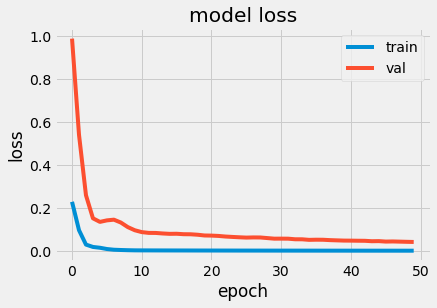

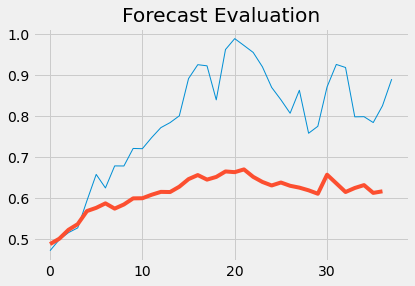

confidence verification data saved as json files: static\past_preds.json and static\past_test.json


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import pickle
import json

plt.style.use('fivethirtyeight')
df=pd.read_csv('data/portfolio_data.csv')
series=np.array(df['DPZ'])
from univariate.rnn_univariate import univariate_ts_rnn
model=univariate_ts_rnn(epochs=50)
scaler,model,past_test_val,past_preds=model.train(data=series)
past_test_val=np.asarray(past_test_val)
past_preds=np.asarray(past_preds)

static_folder = "static"

# Create the static folder if it doesn't exist
if not os.path.exists(static_folder):
    os.makedirs(static_folder)

# File path for the pickle file
past_test_json_file_path = os.path.join(static_folder, "past_test.json")
with open(past_test_json_file_path, "w") as f:
    json.dump(past_test_val.tolist(), f)

past_preds_json_file_path = os.path.join(static_folder, "past_preds.json")
with open(past_preds_json_file_path, "w") as f:
    json.dump(past_preds.tolist(), f)

print("confidence verification data saved as json files: {} and {}".format(past_preds_json_file_path,past_test_json_file_path))